In [1]:
%load_ext autoreload
%autoreload 2

# punto 1 test DS COINK
### definir metricas para medir el desempeno de la compania

1. Una de las labores del equipo de Data en esta empresa es la de definir métricas para evaluar
el desempeño de la compañía. Este punto no tiene una respuesta única y se evaluará su
creatividad. Para ello usará una base de depósitos en Oinks (depositos_oink.csv). Los Oinks
son máquinas en los que la gente puede depositar sus ahorros. Con ella debe construir una
métrica que evalúe qué tan buenos (bajo su propio criterio) son los usuarios de Coink y
calificar a los usuarios contenidos en la muestra. Cualquier gráfica para aclarar su métrica es
bienvenida (use la herramienta de visualización que mejor crea conveniente).

## Hay varias maneras en las que se puede evaluar el desempeño de Coink y de sus usuarios.
### Algunas ideas incluyen:

1. Monto promedio de depósito por usuario: se puede calcular el promedio de todas las operaciones de depósito realizadas por cada usuario.

2. Frecuencia de depósitos: se puede calcular la frecuencia de las operaciones de depósito realizadas por cada usuario, lo que podría reflejar la dedicación y compromiso de los usuarios con Coink.

3. Antigüedad de la cuenta: se puede calcular el tiempo que ha transcurrido desde que un usuario creó su cuenta hasta la fecha actual.

4. Ubicación geográfica: se puede analizar la ubicación geográfica de los usuarios para ver si hay alguna relación entre la ubicación y el desempeño de los usuarios.

### Además de las métricas mencionadas anteriormente, hay otras que podrían ser relevantes y añadir más información para evaluar el desempeño de los usuarios de Coink:

1. Patrón de gasto: se podría analizar la cantidad de dinero que los usuarios depositan en Coink en comparación con su gasto total, para evaluar su capacidad de ahorro.

2. Participación en promociones y descuentos: se podría evaluar la participación de los usuarios en promociones y descuentos ofrecidos por Coink, lo que podría indicar su interés y engagement con la compañía.

3. Comportamiento de los usuarios en días de pago: se podría analizar si los usuarios tienden a depositar más en ciertos días del mes, como días de pago, para evaluar su comportamiento y hábitos financieros.

4. Referencias de otros usuarios: se podría evaluar si los usuarios tienen algún tipo de relación entre ellos, como referidos, lo que podría indicar una red de confianza y apoyo entre los usuarios.

Estos son solo algunos ejemplos adicionales de métricas que podrían ser relevantes para evaluar el desempeño de los usuarios de Coink, y pueden ser ajustados o combinados de acuerdo con los objetivos y criterios específicos de la empresa.

### Agregando la variable espacial, informacion del DANE(personas por manzana-censo del 2018(creo)), mas datos de los usuario.

1. Análisis espacial: se puede utilizar la información de ubicación geográfica de los usuarios para realizar un análisis espacial que permita visualizar la distribución geográfica de los usuarios y su relación con el desempeño de los mismos. Por ejemplo, se puede utilizar un mapa para visualizar la densidad de depósitos en diferentes regiones o crear una analisis de correlacion espacial para identificar la relación entre variables en una localización geográfica específica, entonces podemos ver el comportamiento de las maquina coink(lugar especifico en el espacio) vs las ubicaciones (direccion de residencia) de los usuario, para hacer una segmentacion espacial o ver que oportunidades de inclusion de nuevos sitio potenciales mas cercanos a los usuarios.

Para realizar un análisis espacial, se pueden utilizar herramientas como el paquete de análisis espacial en python o herramientas de visualización como Tableau o QGIS.
Es importante destacar que para realizar un análisis espacial, es necesario que la información de ubicación geográfica de los usuarios sea precisa y confiable.

2. Segmentación de usuarios: se podría segmentar a los usuarios en grupos basados en su desempeño o en otros criterios relevantes, para evaluar patrones y tendencias específicas aqui usaremos RFM para poder hacer la segmentacion.

3. Análisis temporal: se podría analizar la evolución del desempeño de los usuarios a lo largo del tiempo, para identificar tendencias y patrones de crecimiento o declive.

Una vez que se han definido estas métricas, se pueden visualizar mediante gráficos, como histogramas, barras, gráficos de dispersión, etc. para facilitar la interpretación de los resultados.

Es importante destacar que la métrica final dependerá del objetivo y de los criterios que se establezcan para evaluar el desempeño de los usuarios.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import test_coink.utils.paths as path
from test_coink.utils.coink_utils import transform_to_date
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
# Lectura de los datos
usuarios_data = pd.read_csv(path.data_raw_dir('depositos_oinks.csv'))
# ejemplo de los datos
usuarios_data.sample(5)

,Unnamed: 0,user_id,operation_value,operation_date,maplocation_name,user_createddate
2699,2699,3435674f-70dc-4524-a9c0-8139712d796a,"2,000.00",2021-12-23 20:04:39,CC Los Molinos - Zona Montaña Nivel 2,2021-12-23 20:00:29.092023
1056,1056,03fe426c-bd04-4838-9f3f-9cf461b2d56a,"32,250.00",2022-01-20 18:01:53,CC Plaza de las Américas - Plaza Mariposa,2021-04-04 14:43:53.086027
4274,4274,12236056-a282-4fb4-aa13-48ed2319db72,"18,750.00",2021-12-08 14:00:09,CC Plaza de las Américas - Plaza Mariposa,2019-08-28 07:07:56.060863
2998,2998,e7202689-6d7e-4e8a-97cf-76502c73e0b0,950.00,2022-01-23 07:55:31,CC Plaza de las Américas - Plaza Mariposa,2021-07-21 16:06:34.865777
3645,3645,f86064c6-86d0-41ec-9262-d227de89e0ee,"22,700.00",2022-01-28 18:54:51,CC Plaza de las Américas - Plaza Mariposa,2022-01-26 20:59:55.384305


In [4]:
# que typo de objetos son
usuarios_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        4345 non-null   int64  
 1   user_id           4345 non-null   object 
 2   operation_value   4345 non-null   float64
 3   operation_date    4345 non-null   object 
 4   maplocation_name  4345 non-null   object 
 5   user_createddate  4345 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 203.8+ KB


In [5]:
# Transformacion de datos
usuarios_data.drop(columns='Unnamed: 0', inplace=True)

columns = ['operation_date', 'user_createddate']
for col in columns:
    usuarios_data[col] = transform_to_date(col, usuarios_data)

# Limpieza de datos
# Verificación de cantidad de datos NA por columna
print(f"Cantidad de NA por columna:\n {usuarios_data.isnull().sum()}")

# Llenado de datos NA en la columna operation_value con el promedio
# usuarios_data['operation_value'].fillna(usuarios_data['operation_value'].mean(), inplace=True)

# exiten datos duplicados?
print(f"Cantidad de filas duplicadas:{usuarios_data.duplicated().sum()}")

# Eliminación de filas duplicadas
# usuarios_data.drop_duplicates(inplace=True)

Cantidad de NA por columna:
 user_id             0
operation_value     0
operation_date      0
maplocation_name    0
user_createddate    0
dtype: int64
Cantidad de filas duplicadas:0


In [6]:
usuarios_data.describe(include='all')

,user_id,operation_value,operation_date,maplocation_name,user_createddate
count,4345,"4,345.00",4345,4345,4345
unique,1656,NaN,4223,3,1631
top,47e76d57-09d3-4ea4-8531-9b839d83069e,NaN,2022-02-03 14:55:00,CC Plaza de las Américas - Plaza Mariposa,2021-03-22 17:52:00
freq,61,NaN,3,1976,61
first,NaN,NaN,2021-11-26 06:31:00,NaN,2019-08-25 22:56:00
last,NaN,NaN,2022-02-24 15:32:00,NaN,2022-02-23 17:48:00
mean,NaN,"34,618.35",NaN,NaN,NaN
std,NaN,"107,142.69",NaN,NaN,NaN
min,NaN,50.00,NaN,NaN,NaN
25%,NaN,"1,650.00",NaN,NaN,NaN


para entender la data observamos un el comportamiento de las diferentes columnas, donde observamos que tenemos datos de 3 ubicaciones diferentes entre el 26 de noviembre del 2021 y el 24 de febrero del 2022, tambien observamos que hay 1656 usuarios que crearon una cuenta desde el 25 de agosto del 2019 hasta el 23 de febrero del 2022

In [7]:
# Calcular el valor total de depósitos
total_deposits_onik = usuarios_data['operation_value'].sum()
total_deposits_onik
print(f'valor total de depósitos en Oink: {total_deposits_onik}')

valor total de depósitos en Oink: 150416750.0


In [8]:
# Calcular el mediana(para evitar outliers) de los depósitos por usuario
median_deposit_per_user = usuarios_data.groupby('user_id')['operation_value'].sum().median()
median_deposit_per_user

# Calcular el media de los depósitos por usuario
mean_deposit_per_user = usuarios_data.groupby('user_id')['operation_value'].sum().mean()
mean_deposit_per_user

# Calcular el desviasion de los depósitos por usuario
std_deposit_per_user = usuarios_data.groupby('user_id')['operation_value'].sum().std()
std_deposit_per_user

print(f'valor medio de los depósitos por usuario en Oink:{median_deposit_per_user}')
print(f'valor promedio de los depósitos por usuario en Oink:{mean_deposit_per_user}')
print(f'valor de desviasion de los depósitos por usuario en Oink:{std_deposit_per_user}')

valor medio de los depósitos por usuario en Oink:12400.0
valor promedio de los depósitos por usuario en Oink:90831.37077294686
valor de desviasion de los depósitos por usuario en Oink:307650.470435832


observamos que la media esta muy alejada de la mediana y una alta desviasion lo que nos muestra la presencia de outliers, que en este caso son personas que tinen un total de deposito mucho mayor comparados con los demas usuarios y asi mismo puede existir depositos muy pequenios, lo que dificulta obtener un valor medio o promedio de un usuario, esto con el fin de crear una metrica que ayude a medir si es rentable tener una o mas maquinas y asi medir el desempenio de cad amaquina coink 
para combatir esto analizaremos la cantidad total de depositos por usuario, los segmentaremos y veremos sus proporciones

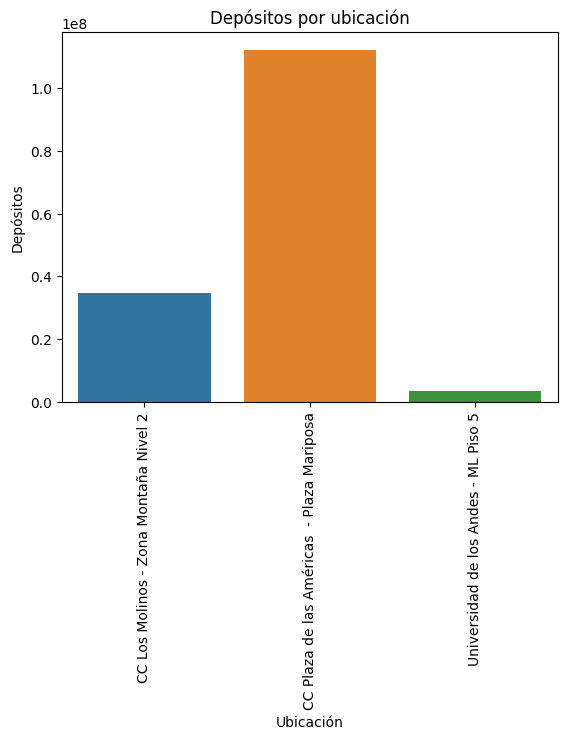

In [9]:
# Calcular los depósitos por ubicación
deposits_by_location = usuarios_data.groupby('maplocation_name')['operation_value'].sum()
# deposits_by_location
# Gráfico de barras para representar los depósitos por ubicación
sns.barplot(x=deposits_by_location.index, y=deposits_by_location.values)
plt.xlabel('Ubicación')
plt.ylabel('Depósitos')
plt.title('Depósitos por ubicación')
plt.xticks(rotation=90)
plt.show()

Se observa como la ubicacion de Plaza de las america es quien mas aporta a la operacion de Coink, seguida pero lejos la ubicacion de Los molinos.

Decidi segmentar los depositos de los usuarios en 5 "muy bajo", "bajo", "medio", "alto" y "muy alto" que describe las propociones de los depositos segun los datos. cabe resaltar que esta segmentacion es en funcion del valor del deposito y no de la frecuencia.


In [10]:
#segmentamos los depositos
usuarios_data['label'] = pd.cut(usuarios_data['operation_value'],bins=5, labels=["muy bajo", "bajo", "medio", "alto", "muy alto"],ordered=True)


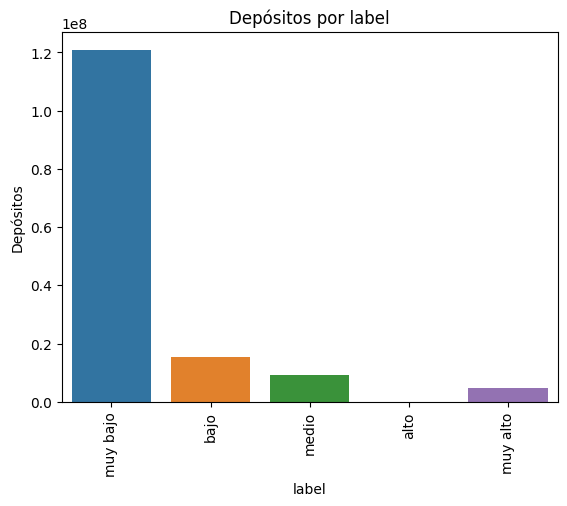

In [11]:
# Calcular los depósitos por ubicación
deposits_by_location = usuarios_data.groupby('label')['operation_value'].sum()
# deposits_by_location
# Gráfico de barras para representar los depósitos por ubicación
sns.barplot(x:deposits_by_location.index, y=deposits_by_location.values)
plt.xlabel('label')
plt.ylabel('Depósitos')
plt.title('Depósitos por label')
plt.xticks(rotation=90)
plt.show()

se observa una concentracion de clientes en el segmento 'muy bajo', pero es de esperarse, ya que el modelo de negocio va dirigido a hacer ahorro tipo alcancia, que son valores muy pequenios. sin embargo hay segmentos 'medio' y 'muy altos' lo que indica que si hay interaciones con grande valores.

In [12]:
# Análisis de depósitos por ubicacion y segmento (3 ubicaciones)
analisis_depositos = usuarios_data.groupby(['maplocation_name','label'])['operation_value'].describe().reset_index()
analisis_depositos

,maplocation_name,label,count,mean,std,min,25%,50%,75%,max
0,CC Los Molinos - Zona Montaña Nivel 2,muy bajo,"1,894.00","18,266.97","39,625.36",50.00,"1,050.00","4,000.00","15,137.50","443,850.00"
1,CC Plaza de las Américas - Plaza Mariposa,muy bajo,"1,944.00","42,554.42","82,308.24",50.00,"2,500.00","9,300.00","40,000.00","516,700.00"
2,CC Plaza de las Américas - Plaza Mariposa,bajo,23.00,"674,765.22","139,218.04","522,000.00","585,125.00","620,350.00","726,825.00","992,900.00"
3,CC Plaza de las Américas - Plaza Mariposa,medio,7.00,"1,320,564.29","178,278.81","1,077,700.00","1,182,025.00","1,361,900.00","1,444,975.00","1,550,350.00"
4,CC Plaza de las Américas - Plaza Mariposa,muy alto,2.00,"2,375,825.00","309,960.26","2,156,650.00","2,266,237.50","2,375,825.00","2,485,412.50","2,595,000.00"
5,Universidad de los Andes - ML Piso 5,muy bajo,475.00,"7,532.84","12,830.41",50.00,"1,300.00","3,300.00","8,250.00","140,050.00"


procedemos a obtener el valor medio por segmento y ubicacion y asi estudiar la rentabilidad que puede tener cada maquina coink con el fin de evaluar colocar mas o quitar alguna maquina.

In [13]:
value_by_location_and_label = usuarios_data.groupby(['maplocation_name','label']).agg({"user_id":'nunique',"operation_value":'sum'}).reset_index()
value_by_location_and_label['mean_value'] = value_by_location_and_label['operation_value']/value_by_location_and_label['user_id']
value_by_location_and_label.dropna(inplace=True)
value_by_location_and_label


,maplocation_name,label,user_id,operation_value,mean_value
0,CC Los Molinos - Zona Montaña Nivel 2,muy bajo,756,"34,597,650.00","45,764.09"
5,CC Plaza de las Américas - Plaza Mariposa,muy bajo,647,"82,725,800.00","127,860.59"
6,CC Plaza de las Américas - Plaza Mariposa,bajo,20,"15,519,600.00","775,980.00"
7,CC Plaza de las Américas - Plaza Mariposa,medio,6,"9,243,950.00","1,540,658.33"
9,CC Plaza de las Américas - Plaza Mariposa,muy alto,2,"4,751,650.00","2,375,825.00"
10,Universidad de los Andes - ML Piso 5,muy bajo,248,"3,578,100.00","14,427.82"


In [14]:
# sns.boxplot(x=usuarios_data['maplocation_name'], y=usuarios_data['operation_value'], hue=usuarios_data['label'])
# plt.xlabel('Frecuencia de depósitos')
# plt.ylabel('Número de usuarios')
# plt.title('Histograma de frecuencia de depósitos por usuario')
# plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
# plt.xticks(rotation=90)
# plt.show()

podemos ver que Plaza las americas y los molinos tienen buenas metricas de recoleccion de coink a diferencia de U. los Andes, recomiendo evaluar si es necesario la maquina coink de la U. los Andes, ver cual es el costo mensual y ver si es rentable o no esta maquina. Para aproximarnos a una posible resouesta agruparemos por ubicacion, label y mes para obtener la frecuencia de uso de las maquinas por usuario y su valor medio mensual

In [16]:
frequency_of_deposits = usuarios_data.groupby(['maplocation_name','label',pd.Grouper(key='operation_date', freq='M')],as_index=False)['user_id'].value_counts().drop(columns='user_id')
frequency_of_deposits.replace(0, np.nan, inplace=True)
frequency_of_deposits = frequency_of_deposits.groupby(['maplocation_name','label','operation_date'],as_index=False).mean()
frequency_of_deposits.dropna(inplace=True)
frequency_of_deposits

,maplocation_name,label,operation_date,count
0,CC Los Molinos - Zona Montaña Nivel 2,muy bajo,2021-11-30,1.44
1,CC Los Molinos - Zona Montaña Nivel 2,muy bajo,2021-12-31,1.95
2,CC Los Molinos - Zona Montaña Nivel 2,muy bajo,2022-01-31,1.82
3,CC Los Molinos - Zona Montaña Nivel 2,muy bajo,2022-02-28,2.10
20,CC Plaza de las Américas - Plaza Mariposa,muy bajo,2021-11-30,1.48
21,CC Plaza de las Américas - Plaza Mariposa,muy bajo,2021-12-31,2.03
22,CC Plaza de las Américas - Plaza Mariposa,muy bajo,2022-01-31,2.12
23,CC Plaza de las Américas - Plaza Mariposa,muy bajo,2022-02-28,2.13
25,CC Plaza de las Américas - Plaza Mariposa,bajo,2021-12-31,1.00
26,CC Plaza de las Américas - Plaza Mariposa,bajo,2022-01-31,1.12


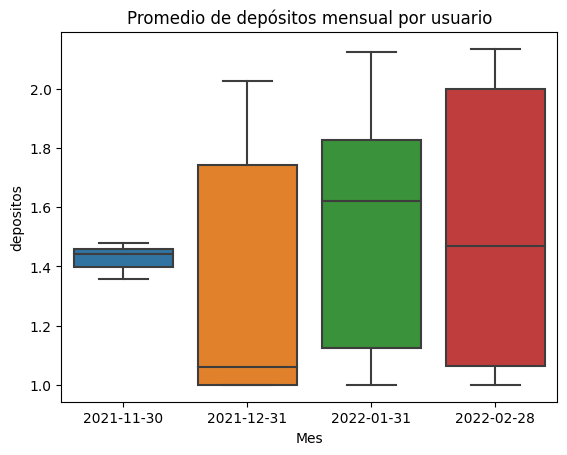

In [17]:
sns.boxplot(x=frequency_of_deposits['operation_date'].astype(str), y=frequency_of_deposits['count'])
plt.xlabel('Mes')
plt.ylabel('promedio de numero de depositos')
plt.title('Promedio de numero de depósitos mensual por usuario')
plt.show()

Con l ainformacion anterior podemos ver que almenos un usuario usa Coink una vez por mes, ademas se confirma la el segmento muy bajo es el que mas interacion tiene con los Coinks, por otra parte se ve un incremento de uso atravez del tiempo para algunos lugares como U. los Andes.

continuaremos con el analisis de deposito mensual

In [18]:
frequency_of_deposits = usuarios_data.groupby(['maplocation_name','label',pd.Grouper(key='operation_date', freq='M')]).agg({"user_id":'size','operation_value':'mean'}).reset_index()
frequency_of_deposits.replace(0, np.nan, inplace=True)
frequency_of_deposits.dropna(inplace=True)
frequency_of_deposits = frequency_of_deposits.rename({"operation_value": "mean_operation_value","user_id":"count_user"}, axis='columns')
frequency_of_deposits

,maplocation_name,label,operation_date,count_user,mean_operation_value
0,CC Los Molinos - Zona Montaña Nivel 2,muy bajo,2021-11-30,85.00,"21,618.24"
1,CC Los Molinos - Zona Montaña Nivel 2,muy bajo,2021-12-31,690.00,"18,328.62"
2,CC Los Molinos - Zona Montaña Nivel 2,muy bajo,2022-01-31,562.00,"22,013.52"
3,CC Los Molinos - Zona Montaña Nivel 2,muy bajo,2022-02-28,557.00,"13,899.01"
20,CC Plaza de las Américas - Plaza Mariposa,muy bajo,2021-11-30,108.00,"30,398.15"
21,CC Plaza de las Américas - Plaza Mariposa,muy bajo,2021-12-31,549.00,"46,222.22"
22,CC Plaza de las Américas - Plaza Mariposa,muy bajo,2022-01-31,728.00,"42,371.57"
23,CC Plaza de las Américas - Plaza Mariposa,muy bajo,2022-02-28,559.00,"41,539.00"
25,CC Plaza de las Américas - Plaza Mariposa,bajo,2021-12-31,4.00,"706,900.00"
26,CC Plaza de las Américas - Plaza Mariposa,bajo,2022-01-31,9.00,"630,805.56"


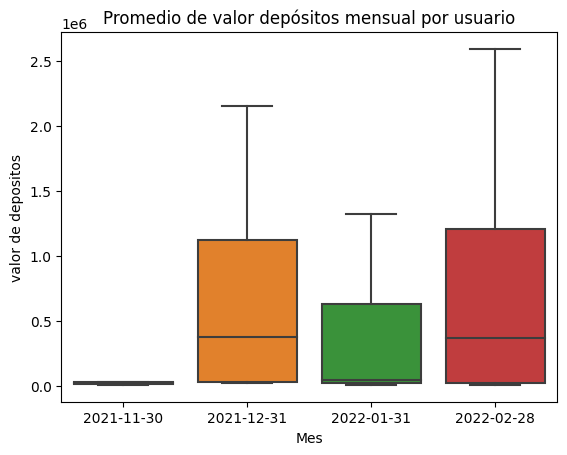

In [20]:
sns.boxplot(x=frequency_of_deposits['operation_date'].astype(str), y=frequency_of_deposits['mean_operation_value'])
plt.xlabel('Mes')
plt.ylabel('valor de depositos')
plt.title('Promedio de valor depósitos mensual por usuario')
plt.show()

observamos que Plaza de las Américas es la maquina que mejor rendimiento tiene, sus promedios de depositos son mayores y tiene mayor cantidad de usuarios mostrnado una retorno de inversion(ROI) mas rapido comparado con las otras ubicaciones, por otra parte se observa como la ubicacion de U. los Andes empieza crecer en usuario y a generar mas depositos. 

continuamos analizando la edad del usuario

In [21]:
usuarios_data
usuarios_data['age_user'] = (usuarios_data['operation_date'] - usuarios_data['user_createddate']).dt.days
age_user = usuarios_data.groupby('user_id')['age_user'].max().reset_index()
age_user.replace(0, np.nan, inplace=True)
age_user.dropna(inplace=True)
age_user

,user_id,age_user
0,001762e3-094d-415c-9304-c7c182e0c16a,105.00
1,002a5f4d-a93d-4cc5-b089-e16169bc16a2,63.00
2,006687d3-8ff3-461e-bdac-cb8e8e4c5a26,260.00
3,0072157e-a634-4cb3-bead-b1a2981485ca,23.00
4,0082af19-8bf7-46f7-8a21-c34e46ac5e2a,61.00
...,...,...
1648,febce3e7-cd89-4835-85d6-3aa25759d35e,24.00
1650,fee9689e-85d2-4609-9aa9-1d43a8a9e26a,318.00
1652,ff5aacc8-320e-4cc3-82a8-059316b857c4,318.00
1653,ffaace49-8a5c-4030-a791-8815b5314283,382.00


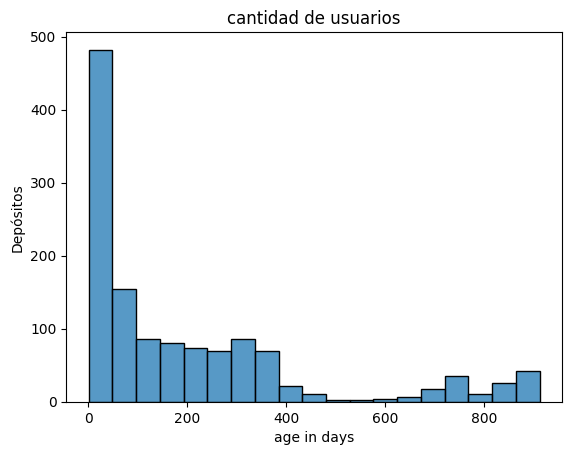

In [22]:
sns.histplot(x=age_user['age_user'])
plt.xlabel('age in days')
plt.ylabel('Depósitos')
plt.title('cantidad de usuarios')
# plt.xticks(rotation=90)
plt.show()

Vemos que hay una porcion grande de usuarios nuevo o que tiene poca eda, sin embargo tambien hay usuarios con una gran edad, decemos revisar bien si estos usuarios estan activo o si por el contrario hicieron chrun.

## Segmentación de usuarios

Para culminar este analisis se realizara una segmentacion de usuarios usando el metodo [RFM](https://www.unir.net/marketing-comunicacion/revista/analisis-rfm/).

In [23]:
usuarios_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   user_id           4345 non-null   object        
 1   operation_value   4345 non-null   float64       
 2   operation_date    4345 non-null   datetime64[ns]
 3   maplocation_name  4345 non-null   object        
 4   user_createddate  4345 non-null   datetime64[ns]
 5   label             4345 non-null   category      
 6   age_user          4345 non-null   int64         
dtypes: category(1), datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 208.2+ KB


In [36]:
from test_coink.utils.coink_utils import Calculate_RFM , score_rfm, Segment_assignment

df_rfm = Calculate_RFMV(usuarios_data, 'user_id')
df_rfm_score = score_rfmv(df_rfm)
df_segment = Segment_assignment(df_rfm_score)
df_segment

,Recency,MonetaryValue,Frequency,recency_score,monetary_score,frequency_score,Total_Score,Segment
user_id,,,,,,,,
001762e3-094d-415c-9304-c7c182e0c16a,4,"44,750.00",3,5,4,4,54,champions
002a5f4d-a93d-4cc5-b089-e16169bc16a2,30,"259,000.00",1,3,5,1,31,about_to_sleep
006687d3-8ff3-461e-bdac-cb8e8e4c5a26,71,"375,600.00",4,1,5,5,15,cant_loose
0072157e-a634-4cb3-bead-b1a2981485ca,20,"433,450.00",10,4,5,5,45,loyal_customers
0082af19-8bf7-46f7-8a21-c34e46ac5e2a,12,"1,500.00",1,4,1,1,41,promising
...,...,...,...,...,...,...,...,...
ff2e941c-8808-4219-bdd9-33202e11c0b0,9,50.00,1,5,1,3,53,potential_loyalists
ff5aacc8-320e-4cc3-82a8-059316b857c4,27,"23,000.00",1,3,3,3,33,need_attention
ffaace49-8a5c-4030-a791-8815b5314283,11,"97,800.00",1,4,5,3,43,potential_loyalists


In [38]:
usuarios_data[usuarios_data['user_id']=='001762e3-094d-415c-9304-c7c182e0c16a']

,user_id,operation_value,operation_date,maplocation_name,user_createddate,label,age_user
1206,001762e3-094d-415c-9304-c7c182e0c16a,"20,450.00",2022-02-15 13:28:00,CC Plaza de las Américas - Plaza Mariposa,2021-11-08 12:06:00,muy bajo,99
1710,001762e3-094d-415c-9304-c7c182e0c16a,"19,300.00",2022-02-21 13:13:00,CC Plaza de las Américas - Plaza Mariposa,2021-11-08 12:06:00,muy bajo,105
2469,001762e3-094d-415c-9304-c7c182e0c16a,"5,000.00",2022-02-05 13:00:00,CC Plaza de las Américas - Plaza Mariposa,2021-11-08 12:06:00,muy bajo,89


In [39]:
usuarios_data[usuarios_data['user_id']=='fffd063d-3fb4-4356-983d-24d1305996a9']

,user_id,operation_value,operation_date,maplocation_name,user_createddate,label,age_user
2149,fffd063d-3fb4-4356-983d-24d1305996a9,"3,300.00",2021-12-19 20:57:00,CC Los Molinos - Zona Montaña Nivel 2,2021-05-30 18:05:00,muy bajo,203


In [37]:
df_segment[["Segment", "Recency", "Frequency", "MonetaryValue"]].groupby("Segment").agg(["mean", "count"])

Recency       Frequency       MonetaryValue      
                       mean count      mean count          mean count
Segment                                                              
about_to_sleep        29.15   136      1.00   136     26,858.09   136
at_Risk               61.65   265      1.78   265     78,773.96   265
cant_loose            60.65    72      4.93    72    176,347.22    72
champions              4.62   189      7.45   189    145,380.69   189
hibernating           65.46   322      1.00   322     39,101.40   322
loyal_customers       21.73   285      4.15   285    208,041.75   285
need_attention        29.36    61      1.31    61     38,586.89    61
new_customers          5.52    54      1.00    54     45,712.96    54
potential_loyalists   11.33   223      1.29   223     32,317.71   223
promising             15.90    49      1.00    49     36,802.04    49

In [46]:
segmento = df_segment.groupby("Segment",as_index=False)['Total_Score'].count()
segmento

,Segment,Total_Score
0,about_to_sleep,136
1,at_Risk,265
2,cant_loose,72
3,champions,189
4,hibernating,322
5,loyal_customers,285
6,need_attention,61
7,new_customers,54
8,potential_loyalists,223
9,promising,49


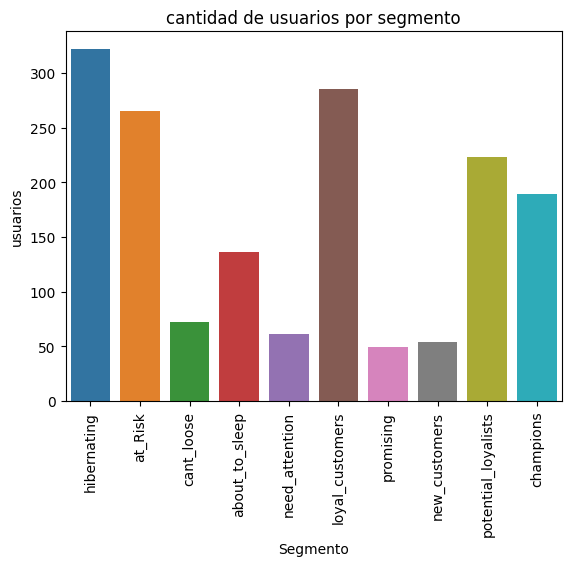

In [51]:
segmento['Segment'] = pd.Categorical(segmento['Segment'], ordered=True,
                                        categories=['hibernating',
                                                        'at_Risk',
                                                        'cant_loose',
                                                        'about_to_sleep',
                                                        'need_attention',
                                                        'loyal_customers',
                                                        'promising',
                                                        'new_customers',
                                                        'potential_loyalists',
                                                        'champions']
)
segmento
sns.barplot(x=segmento.Segment, y=segmento.Total_Score)
plt.xlabel('Segmento')
plt.ylabel('usuarios')
plt.title('cantidad de usuarios por segmento')
plt.xticks(rotation=90)
plt.show()

Esta tabla contiene información sobre diferentes segmentos de clientes, incluyendo la recencia, frecuencia y valor monetario.

Este es el orde de nivel de riesgo par alos usuarios
- 'hibernating' = 322
- 'at_Risk' = 265
- 'cant_loose' = 72
- 'about_to_sleep' =136
- 'need_attention' = 61
- 'loyal_customers' = 285
- 'promising' = 49
- 'new_customers' = 54 
- 'potential_loyalists' = 223 
- 'champions' = 189

Se pueden realizar análisis como:
- Análisis de la recencia: comparar la media de recencia entre los segmentos y determinar cuáles son los segmentos que han depositado recientemente.

- Análisis de frecuencia: comparar la media de frecuencia del deposito entre los segmentos y determinar cuáles son los segmentos más frecuentes.

- Análisis de valor monetario: comparar la media de valor del deposito entre los segmentos y determinar cuáles son los segmentos más valiosos.

- Análisis de segmentos: identificar los segmentos con comportamientos similares y determinar si se pueden agrupar en categorías más amplias.

- Análisis de tendencias: determinar si hay cambios en la recencia, frecuencia y valor monetario a lo largo del tiempo para cada segmento.

Estos análisis pueden ayudar a la compañía a comprender mejor a sus clientes y a tomar decisiones informadas sobre cómo interactuar con ellos